<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_14_L'algoritmo_di_Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
import numpy as np

from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram


## Soluzione classica al problema di Simon

In [4]:
def xor(a,b):
  output = ""
  for i in range(len(a)):
    output += str(int(a[i]) ^ int(b[i]))
  return output

In [7]:
xor("111", "001")

'110'

In [8]:
def simon_function(x):
  secret = "110"
  if x=="000" or x=="110":
    return "101"
  if x == "001" or x == "111":
    return "010"
  if x == "010" or x == "100":
    return "111"
  if x == "011" or x == "101":
    return "000"

In [12]:
def find_secret():
  inputs = ["000", "001", "010", "011", "100", "101", "110", "111"]
  outputs = {}
  for i in range(len(inputs)):
    print("Provo l'input " + inputs[i])
    output = simon_function(inputs[i])
    print("L'output è " + output)
    if output in outputs:
      print("L'output era già stato ottenuto!")
      a = outputs[output]
      b = inputs[i]
      return xor(str(a), str(b))

    outputs[inputs[i]] = output
    print("dizionario degli output aggiornato!")
    print(outputs)

In [13]:
find_secret()

Provo l'input 000
L'output è 101
dizionario degli output aggiornato!
{'000': '101'}
Provo l'input 001
L'output è 010
dizionario degli output aggiornato!
{'000': '101', '001': '010'}
Provo l'input 010
L'output è 111
dizionario degli output aggiornato!
{'000': '101', '001': '010', '010': '111'}
Provo l'input 011
L'output è 000
L'output era già stato ottenuto!


'110'

## Soluzione quantistica al problema di Simon

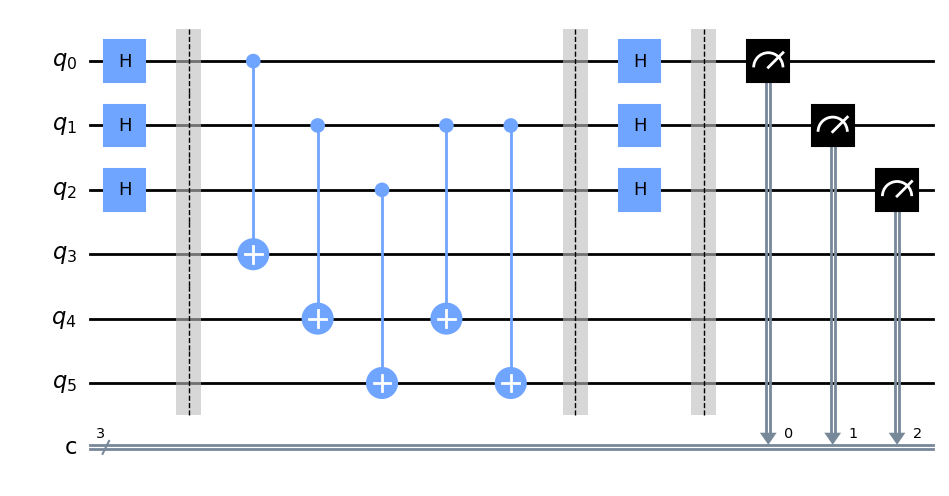

In [21]:
b = '110'
n = len(b)
simon_circuit = QuantumCircuit(2*n, n)
simon_circuit.h(range(n))
simon_circuit.barrier()

simon_circuit.cx(0, 3)
simon_circuit.cx(1, 4)
simon_circuit.cx(2, 5)
simon_circuit.cx(1, 4)
simon_circuit.cx(1, 5)
simon_circuit.barrier()

simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit.measure([0,1,2], [0,1,2])

simon_circuit.draw(output="mpl")

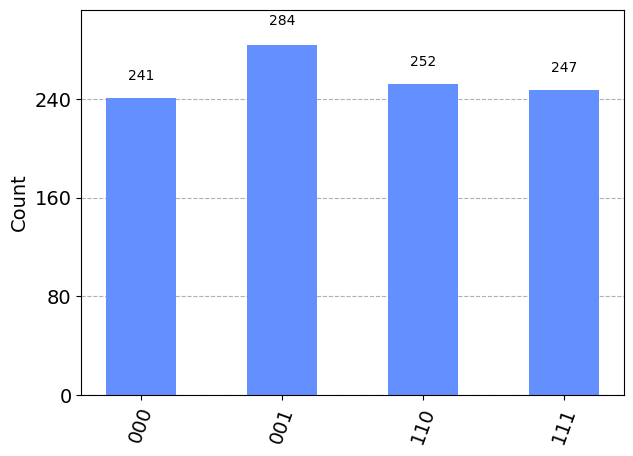

In [22]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [24]:
def dot(x, y):
  accum = 0
  for i in range(len(x)):
    accum += int(x[i]) * int(y[i])
  return accum % 2

In [26]:
for count in counts:
  print("110 dot " + str(count) + " = " +  str(dot("110", count)))

110 dot 110 = 0
110 dot 001 = 0
110 dot 000 = 0
110 dot 111 = 0


In [ ]:
#s dot 001 = 0
#s dot 111 = 0